# Task 3: Prediction using Decision Tree Algorithm

## Given Data : 
The Iris flower data set or Fisher's Iris data set is a multivariate data set.
This has Sepal, Petal (respective Length and Width)- total 4 parameters

End Goal: For the given ‘Iris’ dataset, we need to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it should be able to predict the right class accordingly.

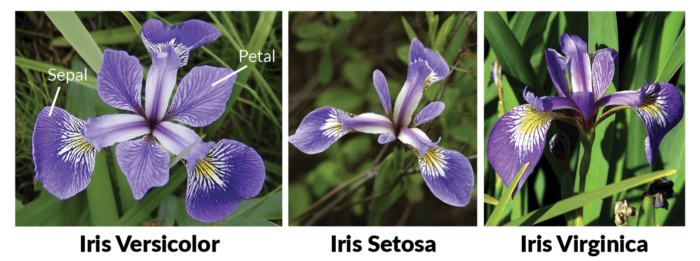

# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Data

In [2]:
#Loading the data in a variable from csv file
iris=pd.read_csv("Iris.csv")

In [3]:
#Getting first 5 rows of data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#To get info like dtypes, no.of rows
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Cleaning

In [5]:
iris.drop('Id',axis=1,inplace=True) #drop unecessary columns

In [6]:
#Obtaining class from species
def getSpecies(sp):
    cl=sp[5:]
    return cl.capitalize()
iris['Species']=iris['Species'].apply(getSpecies)

In [7]:
iris.head(5)#Good to go

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Exploratory Data Analysis

## Univariate Analysis

In [8]:
iris.info()#150 rows of data with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Let's get few statistical information from the data


In [9]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
iris['Species'].value_counts()#50 rows for each class of species 

Versicolor    50
Virginica     50
Setosa        50
Name: Species, dtype: int64

#### Now let's see how length and width are distributed

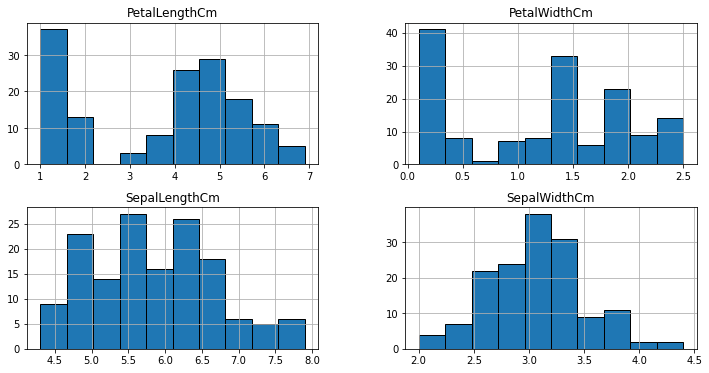

In [11]:
#Plotting histogram for all numerical variables
iris.hist(bins=10,edgecolor="black",figsize=(12,6))
plt.show()

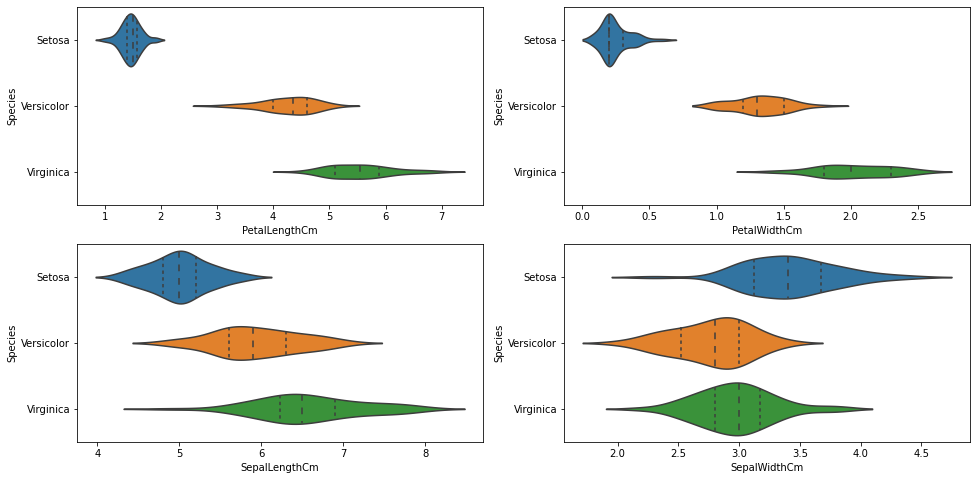

In [12]:
#Plotting violonplot from seaborn 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.violinplot(iris.PetalLengthCm,iris.Species,inner='quartile')
plt.subplot(2,2,2)
sns.violinplot(iris.PetalWidthCm,iris.Species,inner='quartile')
plt.subplot(2,2,3)
sns.violinplot(iris.SepalLengthCm,iris.Species,inner='quartile')
plt.subplot(2,2,4)
sns.violinplot(iris.SepalWidthCm,iris.Species,inner='quartile')
plt.show()

# Bivariate Analysis

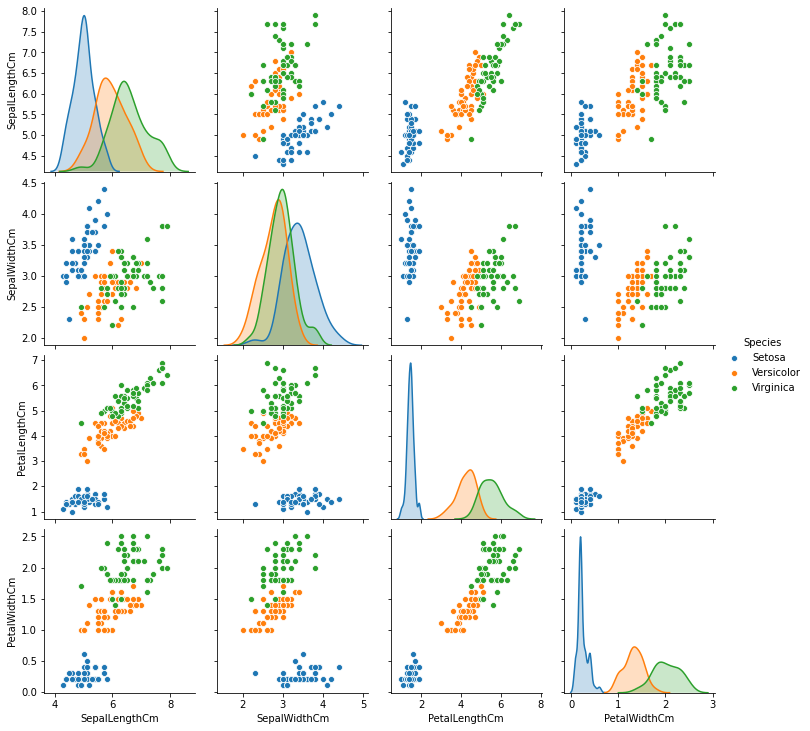

In [13]:
#Getting all possible plots
sns.pairplot(iris,hue="Species")

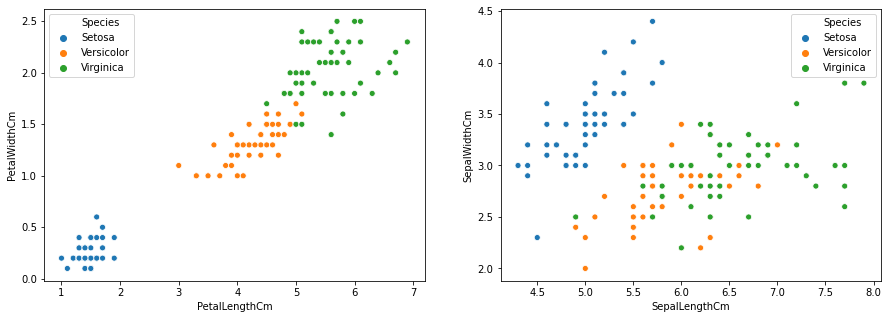

In [14]:
#Plotting PetalWidth, PetalLength & SepalWidth, SepalLength
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(iris.PetalLengthCm,iris.PetalWidthCm,hue=iris.Species)
plt.subplot(1,2,2)
sns.scatterplot(iris.SepalLengthCm,iris.SepalWidthCm,hue=iris.Species)
plt.show()

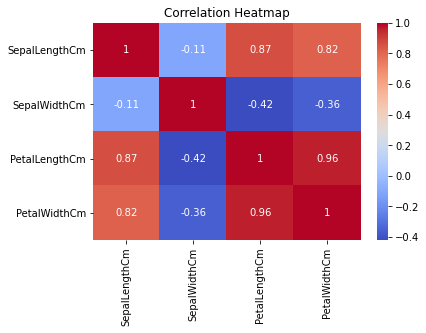

In [15]:
#Plotting heatmap to check correlation b/w variables
sns.heatmap(iris.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### KEY OBSERVATIONS:
1. Petal Width & Petal Length are highly correlated: 0.96 corr

2. Sepal Length is related to Petal Width & Length

3. Sepal Width & Length are not correlated

# Independent-Depependent Variable Split

In [16]:
x=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train Data:",x_train.shape)
print(y_train.shape)
print("Test Data:",x_test.shape)
print(y_test.shape)

Train Data: (120, 4)
(120,)
Test Data: (30, 4)
(30,)


# ML Model Implementation

* This is a classification type of problem. We have three classes of IRIS: Versicolor, Virginica and Setosa.

* The data we have is *well balanced* as each class/category in target has same amount (i.e 50 rows) of data.

In [18]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

# Logistic Regression

In [19]:
lor=LogisticRegression()
lor.fit(x_train,y_train)
y_pred=lor.predict(x_test)
y_pred_train=lor.predict(x_train)

In [20]:
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print("Training Accuracy",accuracy_score(y_train,y_pred_train))

Testing Accuracy 1.0
Training Accuracy 0.975


# KNN

In [21]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [22]:
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print("Training Accuracy",accuracy_score(y_train,y_pred_train))

Testing Accuracy 1.0
Training Accuracy 0.9666666666666667


In [23]:
#Code to get accuracies for KNN with n_neighbors 1 to 14
accuracy_i=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy_i.append(accuracy_score(y_test,y_pred))

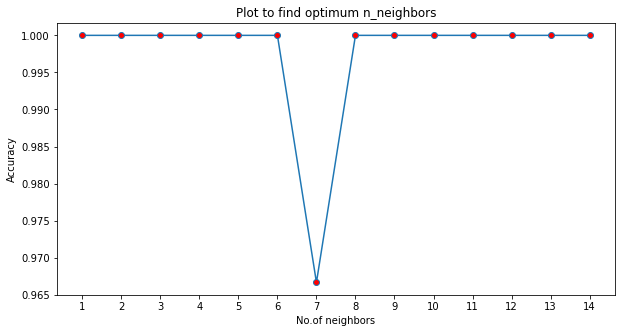

In [24]:
#Plotting optimum n_neighbors
plt.figure(figsize=(10,5))
plt.plot(list(range(1,15)),accuracy_i,marker='o',mfc='red')
plt.xlabel("No.of neighbors")
plt.ylabel("Accuracy")
plt.xticks(range(1,15))
plt.title("Plot to find optimum n_neighbors")
plt.show()

# Decision Tree

In [25]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred_train=dt.predict(x_train)

In [26]:
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print("Training Accuracy",accuracy_score(y_train,y_pred_train))

Testing Accuracy 1.0
Training Accuracy 1.0


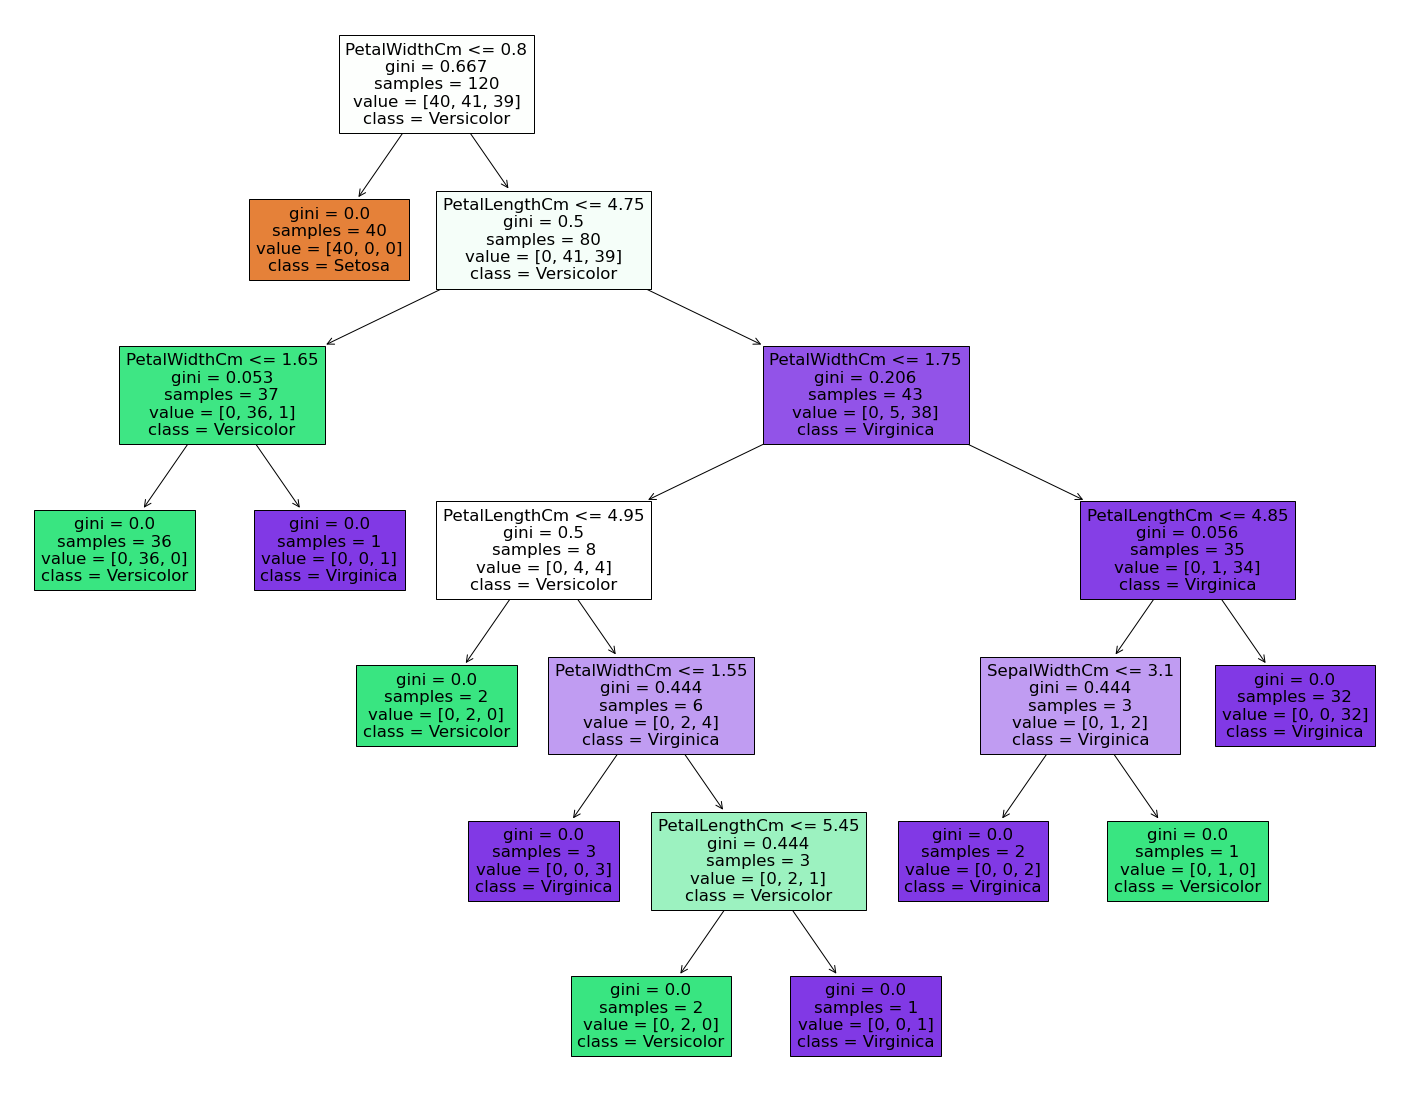

In [27]:
plt.figure(figsize=(25,20))
plot_tree(dt,feature_names=iris.iloc[:,:-1].columns,class_names=['Setosa','Versicolor','Virginica'],filled=True)
plt.show()

In [28]:
dt.feature_importances_

array([0.        , 0.01667014, 0.40593501, 0.57739485])

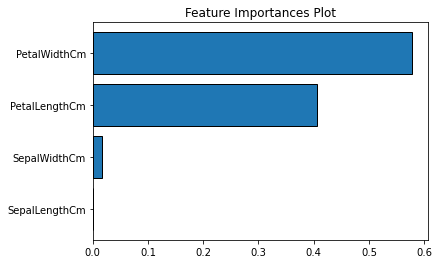

In [29]:
plt.barh(iris.iloc[:,:-1].columns,dt.feature_importances_,edgecolor="black")
plt.title("Feature Importances Plot")
plt.show()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Let's draw a confusion matrix for both training & testing data:
Here as we have 3 classes, we will get a (3 * 3) matrix

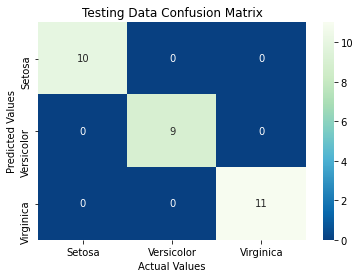

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Setosa','Versicolor','Virginica'],yticklabels=['Setosa','Versicolor','Virginica'],cmap='GnBu_r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Testing Data Confusion Matrix")
plt.show()

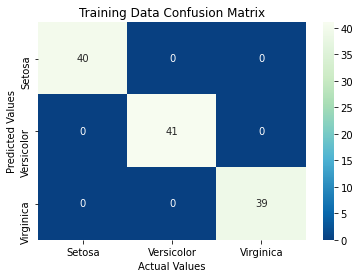

In [32]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Setosa','Versicolor','Virginica'],yticklabels=['Setosa','Versicolor','Virginica'],cmap='GnBu_r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Data Confusion Matrix")
plt.show()

# Summary:
* Logistic Regression, KNN, Decision Tree models were build, among which DT has the best performance. 
* One reason is that Decision tree alogorithms are known for detecting features important for classification.
* Features in decreasing order of their importances: PetalWidth> PetalLength> SepalWidth> SepalLength(=0) as per findings.